# Unit 2 Capstone

### Loading Data File

In [19]:
import os
import pandas as pd

def housePrice_data():
    return pd.read_csv("House_Price_Train_Data.csv")
df = housePrice_data()

print(df.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL      65.0000     8450   Pave   NaN      Reg   
1   2          20       RL      80.0000     9600   Pave   NaN      Reg   
2   3          60       RL      68.0000    11250   Pave   NaN      IR1   
3   4          70       RL      60.0000     9550   Pave   NaN      IR1   
4   5          60       RL      84.0000    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [5]:
print(df.shape)

(1460, 81)


In [6]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Simple Linear Regression

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Fri, 20 Jun 2025   Prob (F-statistic):          2.19e-313
Time:                        21:01:00   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.621e+04   5756.407    -16.713      

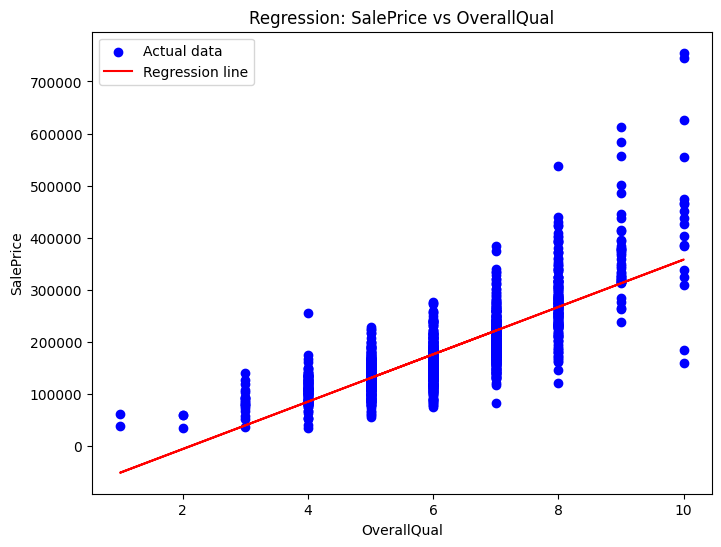

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = housePrice_data()

x = df[['OverallQual']]
y = df['SalePrice']

x = sm.add_constant(x)  # Adds a constant term to the predictor
model = sm.OLS(y, x).fit()

print(model.summary())
y_pred = model.predict(x)
plt.figure(figsize=(8, 6))
plt.scatter(df['OverallQual'], y, color='blue', label='Actual data')
plt.plot(df['OverallQual'], y_pred, color='red', label='Regression line')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('Regression: SalePrice vs OverallQual')
plt.legend()
plt.show()

### Result Explanations

**Adjusted R-squared** tells us that the explanatory variable OverallQual explains 62% of the variance in the dependent variable SalePrice.

**p-value (2.19e-313)** for the F-statistic is less than 0.05, meaning the model is overall statistically significant, indicating a significant relationship between the dependent variable SalePrice and the independent variable OverallQual.

**Coefficient of OverallQual 45440** means that for each one-unit increase in OverallQual (a higher quality score), the SalePrice increases by 45,440 dollars, indicating a positive value; this suggests that higher-quality homes tend to have a higher sale price.

**Intercept (const) -96,210.50** means that if OverallaQual is zero or the lowest quality house, the price would be -96,210.50, although a sale price below 0 is not meaningful in the real world.

**p-value zero for both coefficients** indicates that the predictor is statistically significant at the 95% level; this allows us to reject the null hypothesis that the coefficient equals zero.

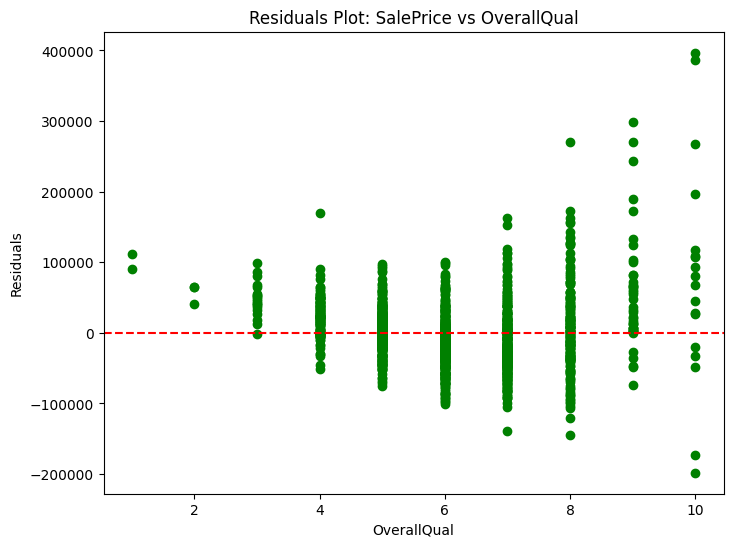

In [23]:
residuals = y - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(df['OverallQual'], residuals, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('OverallQual')
plt.ylabel('Residuals')
plt.title('Residuals Plot: SalePrice vs OverallQual')
plt.show()

In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load data
df = housePrice_data()

# Select independent variables (4 continuous + 1 binary)
X = df[['OverallQual', 'GrLivArea', 'TotRmsAbvGrd', 'YearBuilt', 'HasPool']]  # 4 continuous + 1 binary variable

# Dependent variable
y = df['SalePrice']  # Dependent variable

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the regression model using statsmodels
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print VIF results
print("\nVariance Inflation Factors (VIF):")
print(vif_data)


KeyError: "['HasPool'] not in index"